<a href="https://colab.research.google.com/github/dyoni2/jiyeon/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

train = train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name', 'Parch', 'Embarked', 'Fare', 'SibSp'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'Name', 'Parch', 'Embarked', 'Fare', 'SibSp'], axis=1)

combine=[train,test]
print(train.columns.values)
train.head()

['Survived' 'Pclass' 'Sex' 'Age']


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [106]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [107]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train.head()

,Survived,Pclass,Sex,Age
0,0,3,0,1.0
1,1,1,1,2.0
2,1,3,1,1.0
3,1,1,1,2.0
4,0,3,0,2.0


In [108]:
for dataset in combine:
    dataset["Age"] = dataset.groupby(dataset.Pclass).Age.transform(lambda x: x.fillna(x.median()))

train.head()

,Survived,Pclass,Sex,Age
0,0,3,0,1.0
1,1,1,1,2.0
2,1,3,1,1.0
3,1,1,1,2.0
4,0,3,0,2.0


In [109]:
X_train = train.drop(["Survived"], axis=1)
Y_train = train["Survived"]
X_test  = test.copy().drop("PassengerId", axis=1)

#  SGD 분류

In [116]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=202139830)
sc.fit(X_train, Y_train)
Y_pred = sc.predict(X_test)
acc_sc = round(sc.score(X_train, Y_train) * 100, 2)
acc_sc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


38.38

In [115]:
sc.partial_fit(X_train, Y_train)

print(sc.score(X_train, Y_train))

0.7564534231200898


# 결정 트리

In [117]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202139830)
dt.fit(X_train, Y_train)

acc_decision_tree = round(dt.score(X_train, Y_train) * 100, 2)
acc_decision_tree

80.81

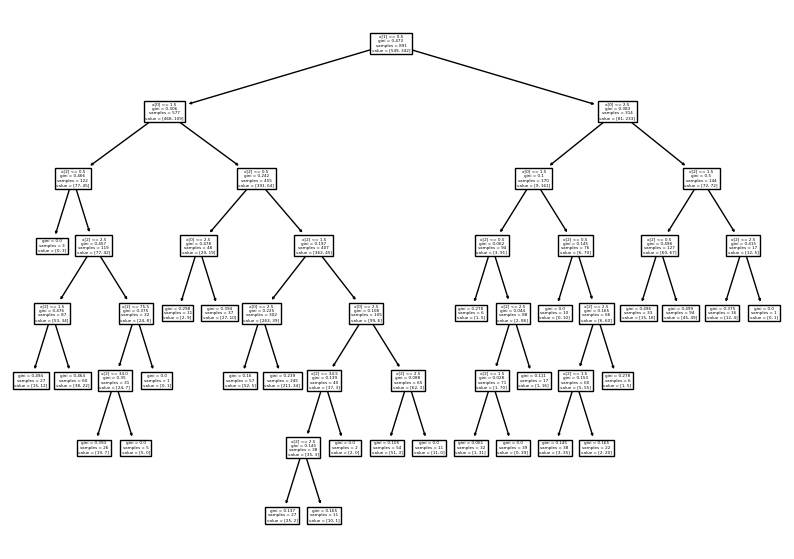

In [118]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

# 랜덤 포레스트

In [121]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202139830)
scores = cross_validate(rf, X_train, Y_train, return_train_score=True, n_jobs=-1)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train, Y_train)
acc_random_forest = round(rf.score(X_train, Y_train) * 100, 2)
acc_random_forest

80.81

# 히스토그램기반 그래디언트 부스팅

In [124]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202139830)
scores = cross_validate(hgb, X_train, Y_train, return_train_score=True, n_jobs=-1)

from sklearn.inspection import permutation_importance

hgb.fit(X_train, Y_train)
result = permutation_importance(hgb, X_train, Y_train, n_repeats=10,
                                random_state=202139830, n_jobs=-1)
print(result.importances_mean)

result = permutation_importance(hgb, X_train, Y_train, n_repeats=10,
                                random_state=202139830, n_jobs=-1)
print(result.importances_mean)

hgb.score(X_train, Y_train)

[0.0637486  0.22996633 0.03041526]
[0.0637486  0.22996633 0.03041526]


0.8058361391694725